## Load libraries

In [1]:
# tensorflow backend
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
import numpy as np
import pandas as pd
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Using TensorFlow backend.
/home/abhijeet/miniconda3/envs/chemvae/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abhijeet/miniconda3/envs/chemvae/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abhijeet/miniconda3/envs/chemvae/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ab

# Load a model

In [2]:
vae = VAEUtils(directory='../models/zinc_properties')

From /home/abhijeet/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1210: calling reduce_prod (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
/home/abhijeet/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/models.py:245: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
From /home/abhijeet/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1192: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
From /home/abhijeet/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:

# Using the VAE


## Decode/Encode 

Might not be perfect (it's probabilistic), try it several times.

smiles <i class="fa fa-arrow-right" aria-hidden="true"></i> x <i class="fa fa-arrow-right" aria-hidden="true"></i> z <i class="fa fa-arrow-right" aria-hidden="true"></i> x_r <i class="fa fa-arrow-right" aria-hidden="true"></i> smiles_r

In [3]:
smiles_1 = mu.canon_smiles('CSCC(=O)NNC(=O)c1c(C)oc(C)c1C')

X_1 = vae.smiles_to_hot(smiles_1,canonize_smiles=True)
z_1 = vae.encode(X_1)
X_r= vae.decode(z_1)

print('{:20s} : {}'.format('Input',smiles_1))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))

print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))

Input                : CSCC(=O)NNC(=O)c1c(C)oc(C)c1C
Reconstruction       : ClCC(=O)N)C(=O)c1c(C)oc(C)c1C
Z representation     : (1, 196) with norm 10.682


## property preditor

In [4]:
print('Properties (qed,SAS,logP):')
y_1 = vae.predict_prop_Z(z_1)[0]
print(y_1)

Properties (qed,SAS,logP):
[0.7728677 2.433176  0.9558563]


## Decode several attempts
VAE are probabilistic

Searching molecules randomly sampled from 5.00 std (z-distance) from the point
Found 9 unique mols, out of 76
SMILES
 0    CSCC(=O)NNC(=O)c1c(C)oc(C)c1C
1    COCC(=O)NNC(=O)c1c(C)oc(C)c1C
2    CSC(C=O)NNC(=O)c1c(C)oc(C)c1C
3    CSCC(=O)NCC(=O)c1c(C)oc(C)c1C
4    COCC(=O)NCC(=O)c1c(C)oc(C)c1C
5    CSC(C=O)NCC(=O)c1c(C)oc(C)c1C
6    COC(C=O)NCC(=O)c1c(C)oc(C)c1C
7    ClCC(=O)NCC(=O)c1c(C)oc(C)c1C
8    ClC(C=O)NNC(=O)c1c(C)oc(C)c1C
Name: smiles, dtype: object
RDKit ERROR: [10:18:58] SMILES Parse Error: syntax error while parsing: CSC@(=O)NCC(=O)c1c(C)oc(C)c1C
RDKit ERROR: [10:18:58] SMILES Parse Error: Failed parsing SMILES 'CSC@(=O)NCC(=O)c1c(C)oc(C)c1C' for input: 'CSC@(=O)NCC(=O)c1c(C)oc(C)c1C'
RDKit ERROR: [10:18:58] non-ring atom 8 marked aromatic
RDKit ERROR: [10:18:58] SMILES Parse Error: syntax error while parsing: CSC@(=O)NC(=O)cc1c(C)oc(C)c1C
RDKit ERROR: [10:18:58] SMILES Parse Error: Failed parsing SMILES 'CSC@(=O)NC(=O)cc1c(C)oc(C)c1C' for input: 'CSC@(=O)NC(=O)cc1c(C)oc(C)c1

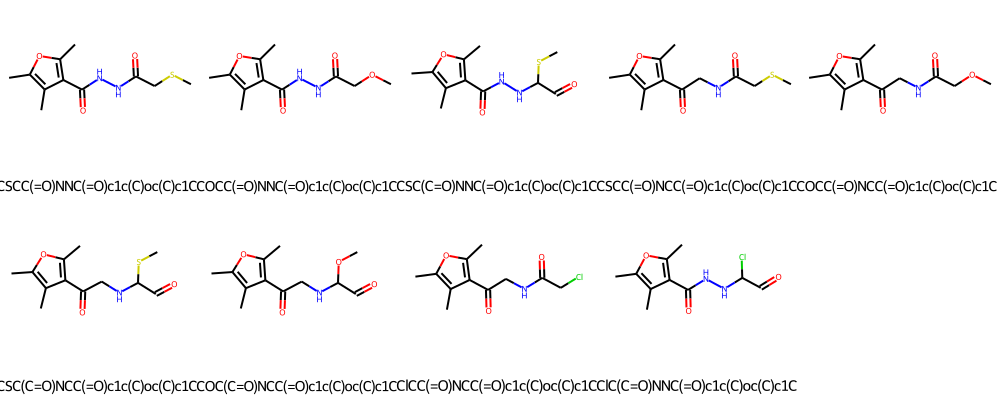

smiles  distance  count  frequency  \
0  CSCC(=O)NNC(=O)c1c(C)oc(C)c1C  0.000005      8   0.105263   
1  COCC(=O)NNC(=O)c1c(C)oc(C)c1C  2.961642      1   0.013158   
2  CSC(C=O)NNC(=O)c1c(C)oc(C)c1C  3.174265      7   0.092105   
3  CSCC(=O)NCC(=O)c1c(C)oc(C)c1C  4.744896     30   0.394737   
4  COCC(=O)NCC(=O)c1c(C)oc(C)c1C  5.266725      7   0.092105   

                                                 mol  
0  <img data-content="rdkit/molecule" src="data:i...  
1  <img data-content="rdkit/molecule" src="data:i...  
2  <img data-content="rdkit/molecule" src="data:i...  
3  <img data-content="rdkit/molecule" src="data:i...  
4  <img data-content="rdkit/molecule" src="data:i...

In [5]:
noise=5.0
print('Searching molecules randomly sampled from {:.2f} std (z-distance) from the point'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df.head()

## PCA of latent space

Sample random points from the training set along with properties

In [6]:
Z, data, smiles = vae.ls_sampler_w_prop(size=50000,return_smiles=True)
prop_opt = 'qed'
prop_df = pd.DataFrame(data).reset_index()
prop_df['smiles']=smiles
prop_df.head()

index     logP       qed       SAS  \
0  156162  2.06520  0.918257  1.998064   
1   69751  0.82340  0.706240  3.385459   
2  214769  1.30210  0.721056  3.013992   
3   69255  2.40838  0.656687  4.131558   
4  228304  1.51482  0.849087  3.468291   

                                              smiles  
0           O=C(c1cccc(NS(=O)(=O)N2CCCCC2)c1)N1CCCC1  
1  CC[C@H](C)C[C@@H](C)NC(=O)CCc1nc2c([nH]1)c(=O)...  
2                            CC[NH2+]CCOc1ccc(Cl)cc1  
3              C/C([NH3+])=C(/C#N)C1=CC(C)(C)CC1(C)C  
4             Cc1ccc(C#CCCO)cc1N1C[C@@H](C)CS1(=O)=O

Perform a PCA projection and color the points based on a property

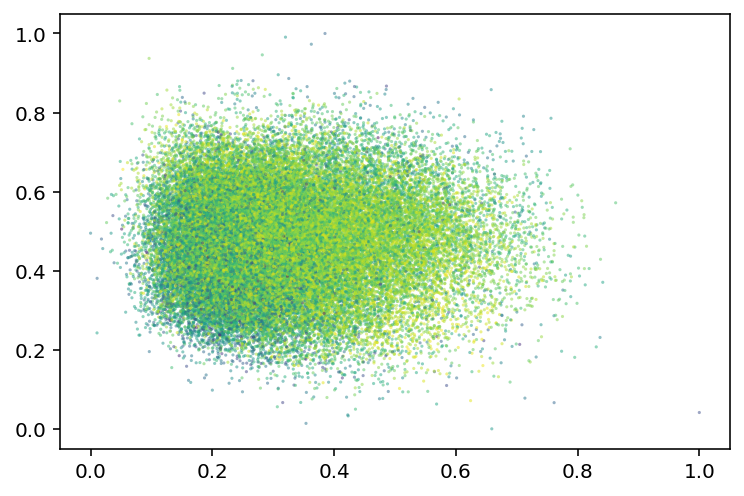

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# do pca and normalize
Z_pca = PCA(n_components=2).fit_transform(Z)
Z_pca = MinMaxScaler().fit_transform(Z_pca)

df = pd.DataFrame(np.transpose((Z_pca[:,0],Z_pca[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

plt.scatter(x=df['x'], y=df['y'], c=df[prop_opt],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.show()

compare with t-SNE, will take some time

In [8]:
from sklearn.manifold import TSNE

Z_tsne = TSNE(n_components=2).fit_transform(Z)
Z_tsne = MinMaxScaler().fit_transform(Z_tsne)

f = pd.DataFrame(np.transpose((Z_tsne[:,0],Z_tsne[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

plt.scatter(x=df['x'], y=df['y'], c=df[prop_opt],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.show()

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements